### Final end-to-end procedure

We will now run the full conformal procedure, randomly shuffling the data into a calibration and test set, before using the best lambda found on calibration to evaluate using hierarchical loss on test. Lets see how far the test loss diverges from the best lambda's loss (which we know is within our threshold of sampling proteins with at least the same superfamily).

In [1]:
from protein_conformal.scope_utils import get_sims_labels, get_thresh_hierarchical, get_hierarchical_loss
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

### Try max hierarchical loss
Taking the max over the set of retrieved proteins within our similarity threshold may be better, as it increases monotonically.

In [2]:
from scope_utils import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('clean_new_v_ec_cluster.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims), max(sims), 1000)

min(x), max(x)

(0.5880813598632812, 25.599563598632812)

In [3]:
loss = []
for l in x: ## Do not reverse your lambdas, because these are euclidean distances not cosine similarities!
    loss.append(get_hierarchical_max_loss(near_ids, l, sim = "euclidean"))



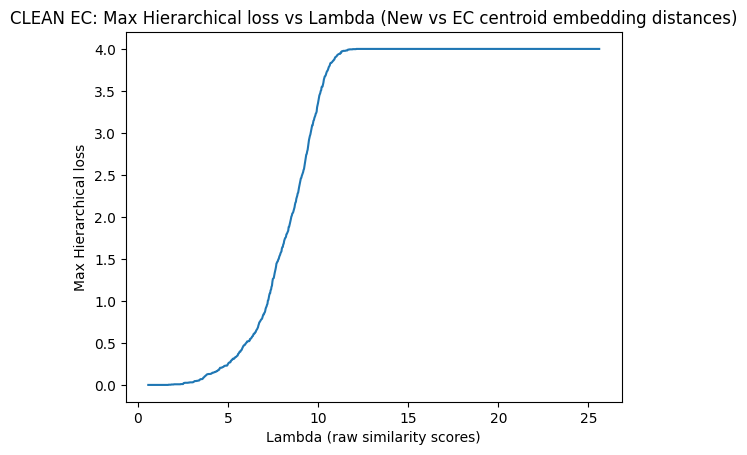

In [5]:
import matplotlib.pyplot as plt
plt.plot(x, loss)
plt.xlabel('Lambda (raw similarity scores)')
plt.ylabel('Max Hierarchical loss')
plt.title('CLEAN EC: Max Hierarchical loss vs Lambda (New vs EC centroid embedding distances)')
plt.show()


In [6]:
num_trials = 10
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha, sim = "euclidean")

    test_loss = get_hierarchical_max_loss(test_data, lhat, sim = "euclidean")

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.9766666666666667
Trial 1: Lambda: 7.20, Test loss: 0.92
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.1726857930928976
Loss of best lambda: 0.9866666666666667
Trial 2: Lambda: 7.17, Test loss: 0.85
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.122612755577844
Loss of best lambda: 0.99
Trial 3: Lambda: 7.12, Test loss: 0.71
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.272831868123006
Loss of best lambda: 0.9866666666666667
Trial 4: Lambda: 7.27, Test loss: 1.23
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.272831868123006
Loss of best lambda: 0.9833333333333333
Trial 5: Lambda: 7.27, Test loss: 1.24
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.97
Trial 6: Lambda: 7.20, Test loss: 0.95
worst case loss: 4
Loss threshold: 0.99
Best lambda: 7.197722311850425
Loss of best lambda: 0.99
Trial 7: Lambda: 7.20, Test lo